# Шаг 0: Импорт библиотек

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Шаг 1: Загрузка данных

In [108]:
data = pd.read_csv('wine-quality.csv', sep=',', decimal=',', quoting=csv.QUOTE_MINIMAL, header=0)

# Шаг 2: Первичный анализ данных

In [109]:
print(data.head())
print(data.info())
print(data.describe())

  fixed acidity volatile acidity citric acid residual sugar chlorides  \
0             7             0.27        0.36           20.7     0.045   
1           6.3              0.3        0.34            1.6     0.049   
2           8.1             0.28         0.4            6.9      0.05   
3           7.2             0.23        0.32            8.5     0.058   
4           7.2             0.23        0.32            8.5     0.058   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
0                  45                  170   1.001     3      0.45     8.8   
1                  14                  132   0.994   3.3      0.49     9.5   
2                  30                   97  0.9951  3.26      0.44    10.1   
3                  47                  186  0.9956  3.19       0.4     9.9   
4                  47                  186  0.9956  3.19       0.4     9.9   

   quality  
0        6  
1        6  
2        6  
3        6  
4        6  
<class 'pandas

# Шаг 3: Очистка данных

In [110]:
print(data.dtypes)

def clean_data(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.replace(' ', '')  
            df[column] = pd.to_numeric(df[column].str.replace(',', '.'), errors='coerce')  
    return df

data = clean_data(data)


data = data.dropna()
data.columns = data.columns.str.replace(' ",', '', regex=True).str.strip()

print(data.columns)
print(data.dtypes)
print(data.describe())

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                  int64
dtype: object
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtyp

# Шаг 4: EDA

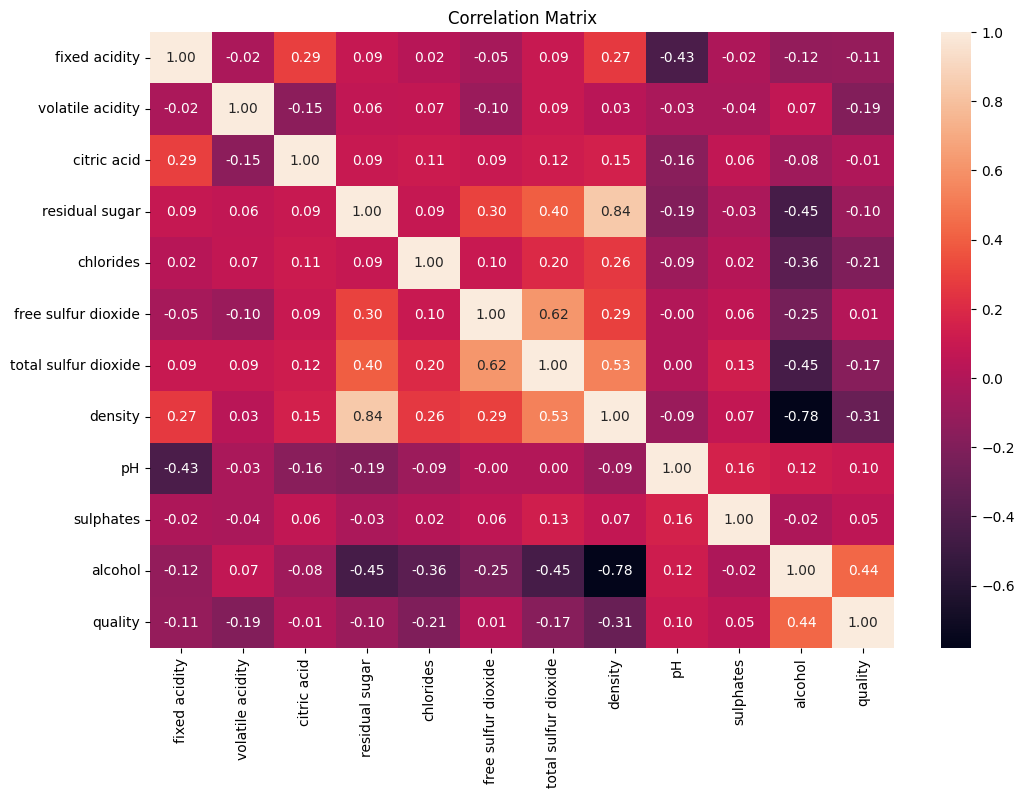

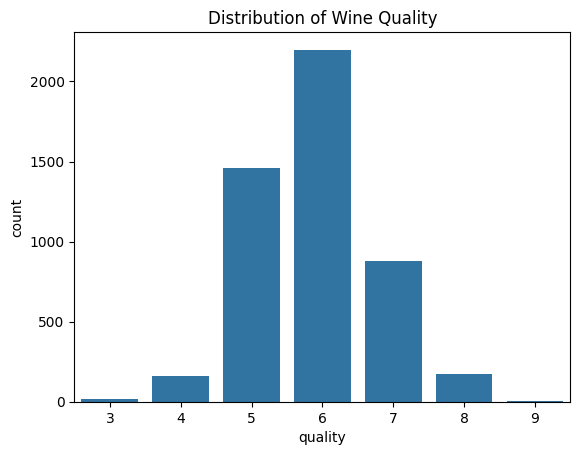

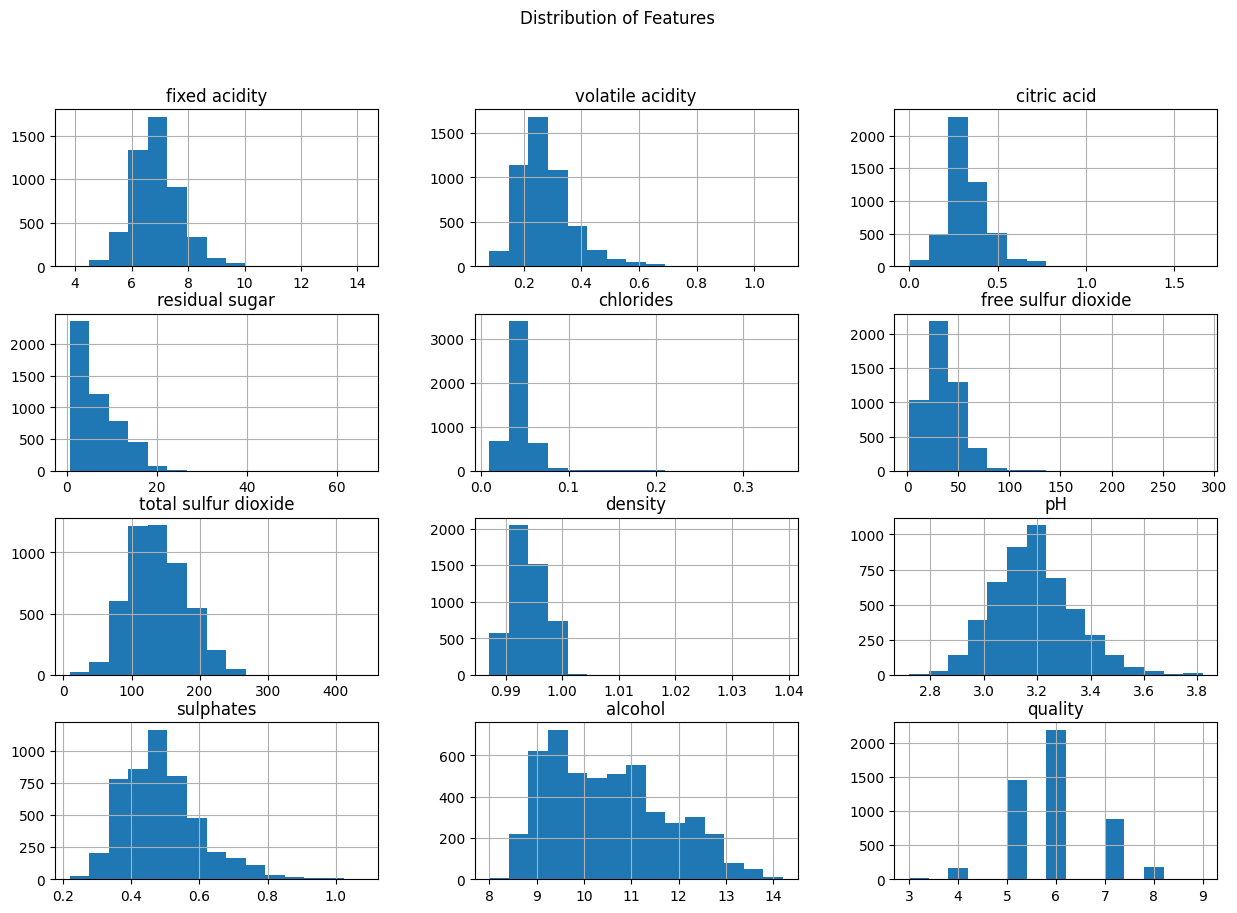

In [111]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()

data.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Distribution of Features')
plt.show()

ВЫВОДЫ 

1. Корреляционная матрица показывает взаимосвязи между различными признаками в наборе данных.
Наиболее сильная положительная корреляция наблюдается между total sulfur dioxide и density (0.84).
Alcohol имеет значительную положительную корреляцию с quality (0.48), что свидетельствует о том, что высокое содержание алкоголя, вероятнее всего, связано с более высокими оценками качества.
Отрицательная корреляция между volatile acidity и quality (-0.39) указывает на то, что с увеличением летучей кислотности качество вина снижается.

2. Распределение классов показывает, что большинство образцов имеют качество 5 и 6, что свидетельствует о том, что эти категории являются наиболее распространенными в наборе данных.

3. Гистограммы показывают распределение каждого количественного признака в наборе данных.
Большинство признаков, таких как fixed acidity, volatile acidity, citric acid и sulphates, имеют распределение, смещенное в одну сторону, что может указывать на наличие аномалий в данных.



# Шаг 5: Преобразование признаков и создание новых

In [112]:
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity']

# Шаг 6: Подготовка данных для классификации

In [114]:
x = data.drop('quality', axis=1)  # Признаки
y = data['quality']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Шаг 7: Масштабирование данных

In [115]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Шаг 8: Обучение моделей и подбор гиперпараметров

In [116]:
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVC': SVC(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced')
}

# Оптимизация и сохранение лучших моделей
best_models = {}
for name, model in models.items():
    param_grid = {}
    
    if name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200]}
    elif name == 'SVC':
        param_grid = {'C': [0.1, 1, 10]}
    elif name == 'Decision Tree':
        param_grid = {'max_depth': [None, 10, 20]}
    
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Шаг 9: Оценка моделей

In [118]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Confusion Matrix for {name}:\n{cm}\n')
    print(f'Classification Report for {name}:\n{classification_report(y_test, y_pred, zero_division=0)}\n')

Confusion Matrix for Random Forest:
[[  1   0   3   3   0   0]
 [  1   5  20  14   0   0]
 [  0   2 306 115   3   0]
 [  0   1 102 539  26   0]
 [  0   0   3 127 149   1]
 [  0   0   0  18  11  20]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           3       0.50      0.14      0.22         7
           4       0.62      0.12      0.21        40
           5       0.71      0.72      0.71       426
           6       0.66      0.81      0.73       668
           7       0.79      0.53      0.64       280
           8       0.95      0.41      0.57        49

    accuracy                           0.69      1470
   macro avg       0.71      0.46      0.51      1470
weighted avg       0.71      0.69      0.68      1470


Confusion Matrix for SVC:
[[  0   0   3   3   1   0   0]
 [  2  27   4   4   2   0   1]
 [  3  73 246  72  28   4   0]
 [  6  49 161 213 191  47   1]
 [  2  12  21  38 151  54   2]
 [  1   1   0   4  23  18   2]
 [ 

# Шаг 10: Выводы

1. Random Forest
 Confusion Matrix: Основное количество предсказаний происходит в классах 5 и 6, что свидетельствует о том, что модель правильнее всего определяет эти классы.
 Precision & Recall:
Высокая точность и полнота для класса 6 (0.66 и 0.81 соответственно), что подтверждает, что модель хорошо справляется с предсказанием качества 6.
Классы 3 и 4 имеют плохую оценку точности (0.50 и 0.62), что указывает на необходимость улучшения.
 Общая аккуратность: 0.69, что представляет хорошую производительность в сравнении с другими моделями.
2. SVC (Support Vector Classifier)
 Confusion Matrix: Модель имеет проблемы с предсказанием для классов 3 и 9, что отражает отсутствие предсказаний для некоторых классов.
 Precision & Recall:
Низкие метрики для класса 3 (точность 0.00) и резко сниженные показатели для остальных классов.
Высокая полнота для класса 4 (0.68), но крайне низкая точность (0.17), что указывает на проблему с неправильными предсказаниями.
 Общая аккуратность: 0.45.
3. Decision Tree
 Confusion Matrix: Модель показывает определённые слабости в предсказании классов 3 и 4.
 Precision & Recall:
Показатели для класса 5 показывают хорошую точность (0.60) и полноту (0.62), что демонстрирует приемлемую производительность.
Как и в случае с другими моделями, классы 3 и 9 не имеют хороших значений, демонстрируя сильную зависимость от данных.
 Общая аккуратность: 0.59.
4. Logistic Regression
 Confusion Matrix: Модель тоже демонстрирует проблемы с предсказанием классов 3 и 9.
 Precision & Recall:
Приличные результаты для класса 5 (точность 0.53 и полнота 0.57), но очень низкие для классов 3 и 4.
Класс 6 демонстрирует точность 0.61, что свидетельствует о сравнительно приемлемой производительности.
Общая аккуратность: 0.46, что является самым низким результатом среди всех моделей.
Общие выводы
Random Forest оказалась лидером среди всех моделей с наиболее высокими значениями точности и полноты, особенно для классов 5 и 6. Это подтверждает эффективность ансамблевых методов, которые лучше обрабатывают сложные взаимосвязи в данных.
SVC и Logistic Regression имеют наихудшие результаты, вероятно, из-за тривиальных характеристик данных, которые могут потребовать дополнительного предварительного анализа или балансировки классов.
Decision Tree продемонстрировала удовлетворительные результаты.